In [1]:
import folium 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../utils/')
from data_extraction import DataExtraction
dextract = DataExtraction()

In [4]:
df = dextract.load_data('../data/features.csv')
df.head(10)

,id,order_id,driver_id,driver_action,lat,lng,order_origin,trip_origin,trip_destination,trip_Start_time,trip_end_time,driver_order_dst,trip_dstance,trip_time,trip_speed,month,day,week_day,hour
0,1,392001,243828,accepted,6.602207,3.270465,"(6.6022066, 3.2704649)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,693.62,21048.29,0 days 00:03:37,96.996728,7,1,3,9
1,2,392001,243588,rejected,6.592097,3.287445,"(6.5920972, 3.2874447)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1554.09,21048.29,0 days 00:03:37,96.996728,7,1,3,9
2,3,392001,243830,rejected,6.596133,3.281784,"(6.5961334, 3.2817841)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,788.35,21048.29,0 days 00:03:37,96.996728,7,1,3,9
3,4,392001,243539,rejected,6.596142,3.280526,"(6.5961416, 3.2805263)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,694.07,21048.29,0 days 00:03:37,96.996728,7,1,3,9
4,5,392001,171653,rejected,6.609232,3.288800,"(6.6092317, 3.2887999)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1623.33,21048.29,0 days 00:03:37,96.996728,7,1,3,9
5,6,392001,245662,rejected,6.593095,3.287759,"(6.5930949, 3.2877592)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1513.60,21048.29,0 days 00:03:37,96.996728,7,1,3,9
6,7,392001,171651,rejected,6.613538,3.270779,"(6.613538, 3.2707793)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1532.64,21048.29,0 days 00:03:37,96.996728,7,1,3,9
7,8,392001,243906,rejected,6.591838,3.276124,"(6.591838, 3.2761242)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1024.95,21048.29,0 days 00:03:37,96.996728,7,1,3,9
8,9,392001,226949,rejected,6.610941,3.276126,"(6.610941393307, 3.2761261146546)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1102.23,21048.29,0 days 00:03:37,96.996728,7,1,3,9
9,10,392001,243769,rejected,6.617199,3.271723,"(6.617199, 3.2717225)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1876.73,21048.29,0 days 00:03:37,96.996728,7,1,3,9


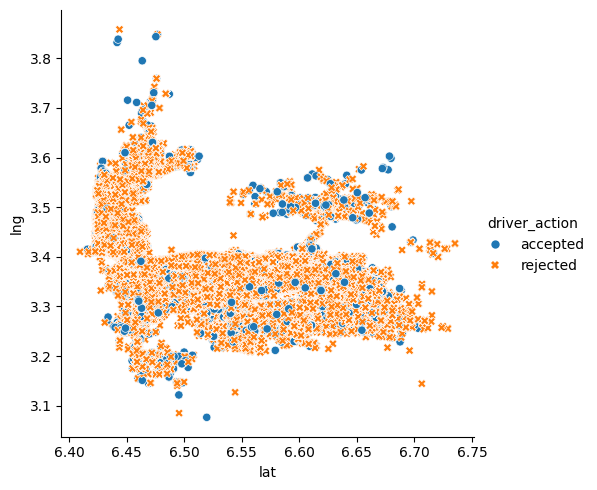

In [5]:
sns.relplot(
    data=df,
    x="lat", y="lng", hue="driver_action", style="driver_action"
)

In [6]:
df_acc = df.groupby(['order_id','driver_action']).agg(
    {'driver_order_dst':'mean'}).reset_index()
# df_acc['dod'] = df_acc['driver_order_dst']['mean']
df_acc

,order_id,driver_action,driver_order_dst
0,392001,accepted,693.620000
1,392001,rejected,1301.110000
2,392005,accepted,1968.050000
3,392005,rejected,1766.937000
4,392009,accepted,2954.030000
...,...,...,...
51177,497721,rejected,3124.010000
51178,510268,accepted,1847.630000
51179,510268,rejected,2273.346667
51180,517948,accepted,2310.200000


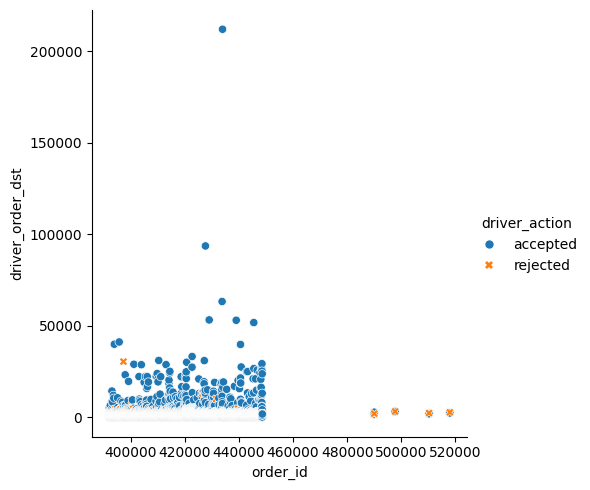

In [8]:
sns.relplot(
    data=df_acc[df_acc['driver_order_dst']<500000],
    x="order_id", y="driver_order_dst", hue="driver_action", style="driver_action"
)

In [9]:
accepted_df = df[df['driver_action']=='accepted']
rejected_df = df[df['driver_action']=='rejected']

print('accepted shape {}'.format(accepted_df.shape))
print('rejected shape {}'.format(rejected_df.shape))

accepted shape (25870, 19)
rejected shape (1529847, 19)


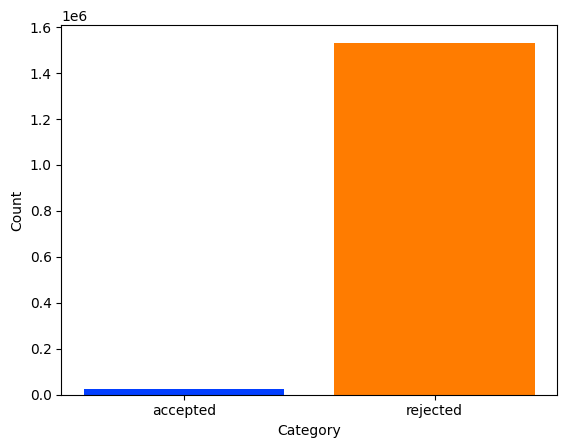

In [11]:
plt.bar(['accepted', 'rejected'], [25902, 1531837], color=palette_color)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [12]:
df_acc = df.groupby(['driver_action','month']).agg(
    {'driver_action':['count']}).reset_index()
df_acc

,driver_action,month,driver_action
,,,count
0,accepted,1,1
1,accepted,2,2
2,accepted,7,25865
3,accepted,9,2
4,rejected,1,3
5,rejected,2,74
6,rejected,7,1529489
7,rejected,8,217
8,rejected,9,64


In [13]:
df_acc_new = pd.DataFrame()
df_acc_new['count'] = df_acc['driver_action']['count'] 
df_acc_new['driver_action'] = df_acc['driver_action']['']  
df_acc_new['month'] = df_acc['month']

<Axes: xlabel='month', ylabel='count'>

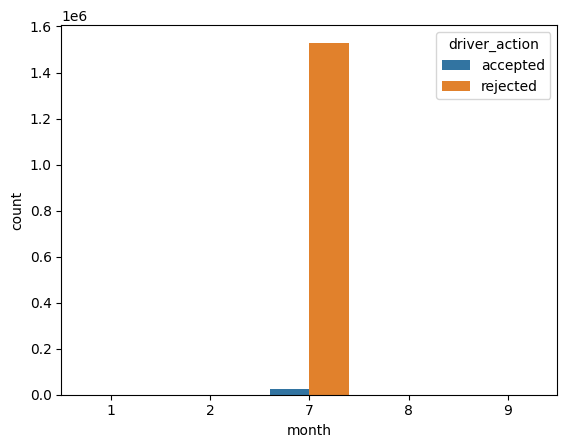

In [14]:
sns.barplot(
    data=df_acc_new,
    x="month", y="count", hue="driver_action"
)

In [15]:
df_acc = df.groupby(['driver_action','week_day']).agg(
    {'driver_action':['count']}).reset_index()
df_acc

,driver_action,week_day,driver_action
,,,count
0,accepted,0,2750
1,accepted,1,3013
2,accepted,2,3204
3,accepted,3,6443
4,accepted,4,6724
5,accepted,5,2524
6,accepted,6,1212
7,rejected,0,157984
8,rejected,1,357254


In [16]:
df_acc_new = pd.DataFrame()
df_acc_new['count'] = df_acc['driver_action']['count'] 
df_acc_new['week_day'] = df_acc['week_day'] 
df_acc_new['driver_action'] = df_acc['driver_action'][''] 

<Axes: xlabel='week_day', ylabel='count'>

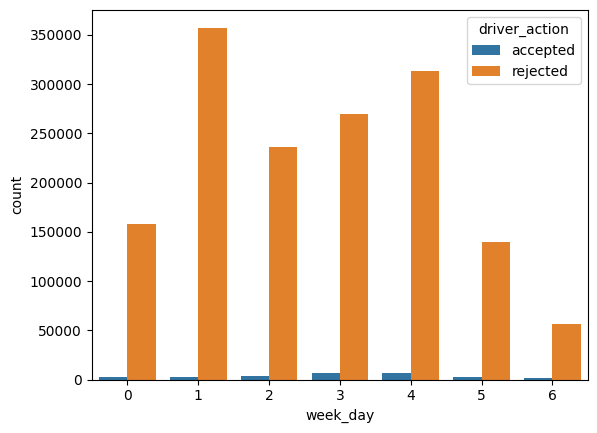

In [18]:
sns.barplot(
data=df_acc_new,
x="week_day", y="count", hue="driver_action"
)

In [19]:
df_acc = df.groupby(['driver_action','day']).agg(
    {'driver_action':['count']}).reset_index()
df_acc

,driver_action,day,driver_action
,,,count
0,accepted,1,3233
1,accepted,2,3416
2,accepted,3,2523
3,accepted,4,1213
4,accepted,5,2750
5,accepted,6,3013
6,accepted,7,3204
7,accepted,8,3210
8,accepted,9,3305


In [20]:
df_acc_new = pd.DataFrame()
df_acc_new['count'] = df_acc['driver_action']['count'] 
df_acc_new['day'] = df_acc['day'].astype('int')
df_acc_new['driver_action'] = df_acc['driver_action'][''] 

<Axes: xlabel='day', ylabel='count'>

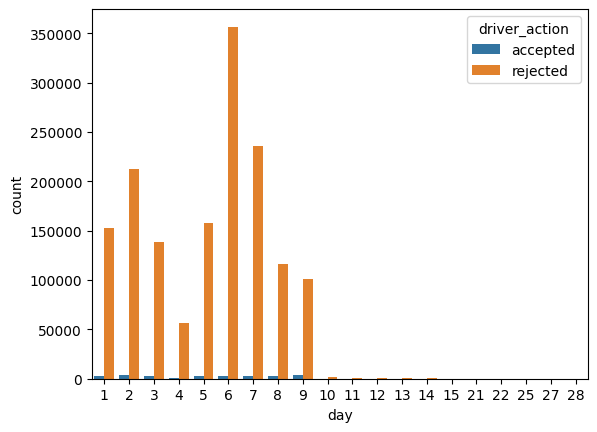

In [21]:
sns.barplot(
    data=df_acc_new,
    x="day", y="count", hue="driver_action"
)

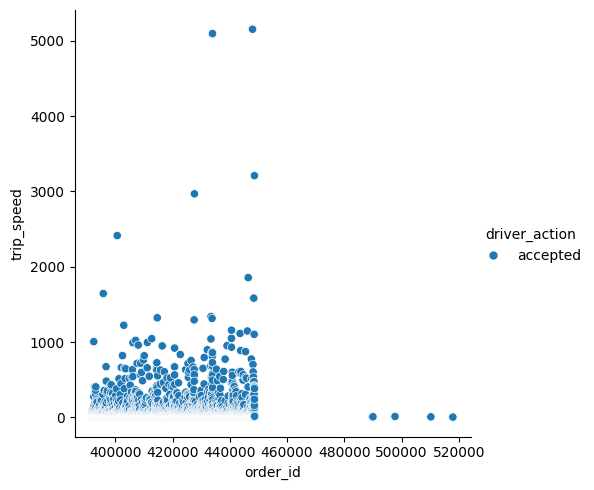

In [22]:
sns.relplot(
    data=accepted_df,
    x="order_id", y="trip_speed", hue="driver_action", style="driver_action"
)

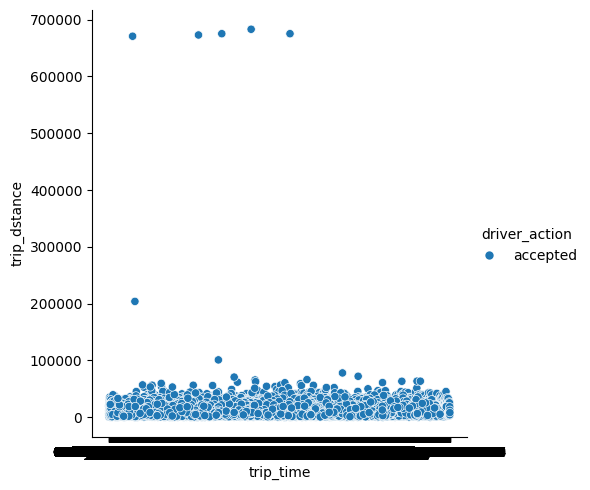

In [23]:
sns.relplot(
    data=accepted_df,
    x="trip_time", y="trip_dstance", hue="driver_action", style="driver_action"
)

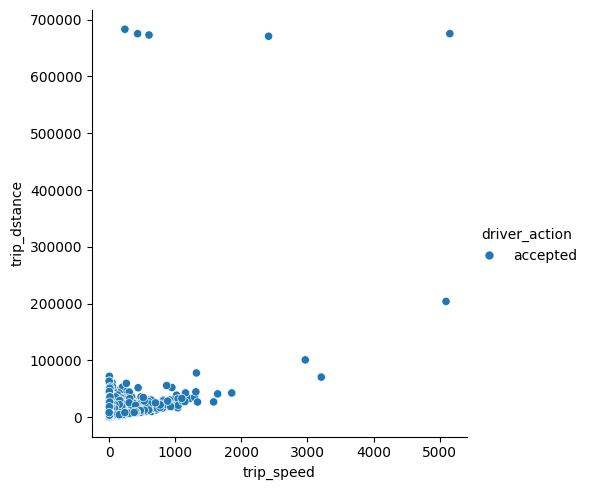

In [24]:
sns.relplot(
    data=accepted_df,
    x="trip_speed", y="trip_dstance", hue="driver_action", style="driver_action"
)

In [25]:

handed_over = accepted_df[accepted_df['trip_speed'] < 10]
print('Handed over deliveries count {}'.format(handed_over.shape)) 

Handed over deliveries count (22816, 19)


In [26]:
df_acc = df.groupby(['driver_action','hour']).agg(
    {'driver_action':['count']}).reset_index()
df_acc

,driver_action,hour,driver_action
,,,count
0,accepted,0,2
1,accepted,2,1
2,accepted,6,51
3,accepted,7,360
4,accepted,8,1053
5,accepted,9,1808
6,accepted,10,2363
7,accepted,11,2681
8,accepted,12,2789


In [27]:
df_acc_new = pd.DataFrame()
df_acc_new['count'] = df_acc['driver_action']['count'] 
df_acc_new['hour'] = df_acc['hour'].astype('int')
df_acc_new['driver_action'] = df_acc['driver_action'][''] 

<Axes: xlabel='hour', ylabel='count'>

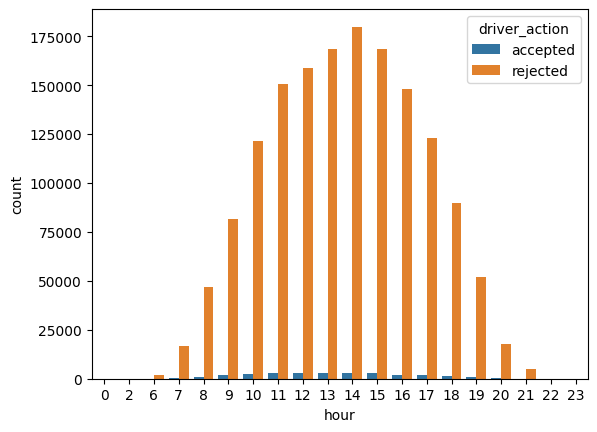

In [28]:
sns.barplot(
    data=df_acc_new,
    x="hour", y="count",hue='driver_action'
)

In [29]:
df_acc_new_acc = df_acc_new[df_acc_new['driver_action']=='accepted']
df_acc_new_rej = df_acc_new[df_acc_new['driver_action']=='rejected']

<Axes: xlabel='hour', ylabel='count'>

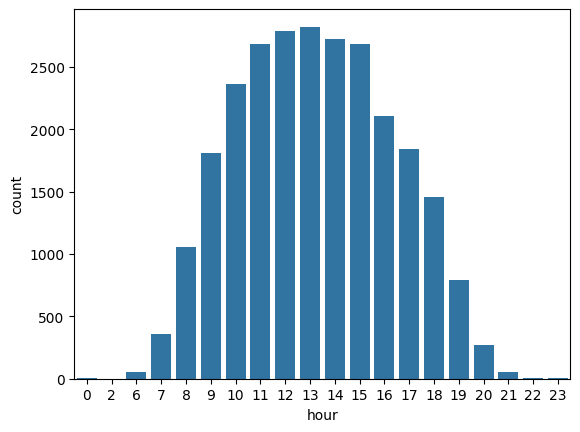

In [30]:
sns.barplot(
    data=df_acc_new_acc,
    x="hour", y="count"
)

<Axes: xlabel='hour', ylabel='count'>

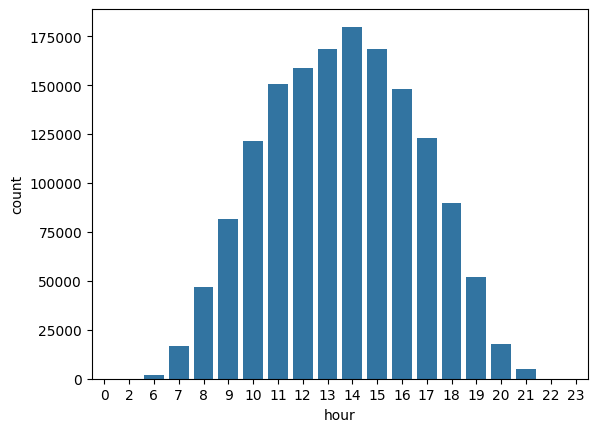

In [31]:
sns.barplot(
    data=df_acc_new_rej,
    x="hour", y="count"
)